In [2]:
import pandas as pd
from pandas.api.types import CategoricalDtype

In [3]:
import numpy as np

In [4]:
# CSV dataset file name
file_name = 'D1.csv'

In [5]:
# Please put csv file in the same folder with this jupyter notebook
df = pd.read_csv(file_name)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49914 entries, 0 to 49913
Data columns (total 40 columns):
Unnamed: 0                  49914 non-null int64
encounter_id                49914 non-null int64
patient_nbr                 49914 non-null int64
race                        49914 non-null object
gender                      49914 non-null object
age                         36831 non-null object
weight                      49914 non-null object
admission_type_id           49914 non-null int64
discharge_disposition_id    49914 non-null int64
admission_source_id         49914 non-null int64
length_of_stay              49914 non-null int64
payer_code                  49914 non-null object
medical_specialty           49914 non-null object
num_lab_procedures          49914 non-null int64
num_procedures              49914 non-null int64
num_medications             49914 non-null int64
number_outpatient           49914 non-null int64
number_emergency            49914 non-null int64
num

# I. Correct error

The following cells were created first to count the number of missing values in each variable in the dataset. This was required prior to changing the data types to eliminate potential errors occurring in transforming the data types. We compared the output count from each cell to the total number of values in the dataset to identify whether the missing data was a significant issue. Invalid values affects whether pandas library can or cannot alter the data type

In [7]:
# count number of ? in 'race' col
count_race = (df['race'] == '?').sum()
print(count_race)
# replace ? by mode value

0


In [8]:
# count number of Unknown/Invalid in 'gender' col
count_gender = (df['gender'] == 'Unknown/Invalid').sum()

print(count_gender)
# only 1 row => can eliminate

0


In [9]:
# count number of ? in 'payer_code' col
count_pc = (df['payer_code'] == '?').sum()
print(count_pc)

0


In [10]:
# count number of ? in 'medical_specialty' col
count_ms = (df['medical_specialty'] == '?').sum()
print(count_ms)
# replace ? by mode value

0


In [11]:
# count number of ? in 'number_outpatient' col
count_outpatient = (df['number_outpatient'] == '?').sum()
print(count_outpatient)
# only 20 rows => can eliminate

0


C:\Users\melan\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [12]:
# count number of ? in 'number_emergency' col
count_ne = (df['number_emergency'] == '?').sum()
print(count_ne)
# only 69 rows => can eliminate

0


In [13]:
# count number of ? in 'number_inpatient' col
count_inp = (df['number_inpatient'] == '?').sum()
print(count_inp)
# only 15 rows => can eliminate

0


In [14]:
# count number of ? in 'number_inpatient' col
diag_1_inp = (df['diag_1'] == '?').sum()
print(diag_1_inp)
# only 11 rows => can eliminate

0


In [15]:
# count number of ? in 'number_inpatient' col
diag_2_inp = (df['diag_2'] == '?').sum()
print(diag_2_inp)
# replace ? by mode value

0


In [16]:
# count number of ? in 'number_inpatient' col
diag_3_inp = (df['diag_3'] == '?').sum()
print(diag_3_inp)
# replace ? by mode value

0


In [17]:
# count number of ? in 'number_inpatient' col
count_chl = (df['chlorpropamide'] == '?').sum()
print(count_chl)
# only 1 row => can eliminate

0


In [18]:
# count number of ? in 'weight' col
count_weight = (df['weight'] == '?').sum()
print(count_weight)
# replace ? by mode value

0


### a. Remove invalid/unknow rows

The following cell is informed by the counts above. Only those columns with small counts have been included in this cell. This removes the rows of data where the observations are invalid (unknown/invalid) or with question mark (?). This efficiently allows for the dataset to be processed and visualised appropriately later. 

In [19]:
# list error condition
error_invalid = ['Unknown/Invalid']
error_questionMark = ['?']

# Remove row with error condition which have small amount in dataset
# Check if a row has column with error condition => eliminate that row
df = df[~(df['gender'].isin(error_invalid))]
df = df[~(df['number_outpatient'].isin(error_questionMark))]
df = df[~(df['number_emergency'].isin(error_questionMark))]
df = df[~(df['number_inpatient'].isin(error_questionMark))]
df = df[~(df['diag_1'].isin(error_questionMark))]
df = df[~(df['chlorpropamide'].isin(error_questionMark))]


In [20]:
# Check AFTER remove invalid unknow rows
# 0 should be printed
print('**** Check AFTER remove invalid unknow rows ***')
print('**** gender ****')
print((df['gender'] == 'Unknown/Invalid').sum())
print('**** number_outpatient ****')
print((df['number_outpatient'] == '?').sum())
print('**** number_emergency ****')
print((df['number_emergency'] == '?').sum())
print('**** number_inpatient ****')
print((df['number_inpatient'] == '?').sum())
print('**** diag_1 ****')
print((df['diag_1'] == '?').sum())
print('**** chlorpropamide ****')
print((df['chlorpropamide'] == '?').sum())

**** Check AFTER remove invalid unknow rows ***
**** gender ****
0
**** number_outpatient ****
0
**** number_emergency ****
0
**** number_inpatient ****
0
**** diag_1 ****
0
**** chlorpropamide ****
0


### b. Replace invalid/unknow col by mean or mode (Large amount shouldn't remove)

The following cells focus on the variables that have a large number of invalid/unknown values, where it would significantly alter the dataset to remove whole rows of data. Accordingly, the string data types were replaced by the mode value for the variable (race, payer code, medical speciality, diagnosis 2, diagnosis 3 and weight). The integer data types were replaced by the mean value for that variable....

#### String data type => replace by mode value
##### gender, payer_code, medical_specialty, weight

The following cell replaces all values of '?' with NaN. 

In [21]:
# replace '?'' with NaN to calculate exactly mode
df['race'] = df['race'].replace({'?': np.NaN})
df['payer_code'] = df['payer_code'].replace({'?': np.NaN})
df['medical_specialty'] = df['medical_specialty'].replace({'?': np.NaN})
df['diag_2'] = df['diag_2'].replace({'?': np.NaN})
df['diag_3'] = df['diag_3'].replace({'?': np.NaN})
df['weight'] = df['weight'].replace({'?': np.NaN})

In [22]:
# TODO: look at tur resource
# select race mode value by getting the first element from return list
race_mode = df['race'].mode().values[0]
# replace ? by mode value for string datatype
df['race'] = df['race'].replace({np.NaN: race_mode})

In [23]:
print('**** race AFTER replacing by mode value ****')
print((df['race'] == np.NaN).sum())

**** race AFTER replacing by mode value ****
0


In [24]:
# select payer_code mode value by getting the first element from return list
payerCode_mode = df['payer_code'].mode().values[0]
# replace ? by mode value for string datatype
df['payer_code'] = df['payer_code'].replace({np.NaN: payerCode_mode})

In [25]:
print('**** payer_code AFTER replacing by mode value ****')
print((df['payer_code'] == np.NaN).sum())

**** payer_code AFTER replacing by mode value ****
0


In [26]:
# select diag_2 mode value by getting the first element from return list
diag_2_mode = df['diag_2'].mode().values[0]
# replace ? by mode value for string datatype
df['diag_2'] = df['diag_2'].replace({np.NaN: diag_2_mode})

In [27]:
print('**** diag_2 AFTER replacing by mode value ****')
print((df['diag_2'] == np.NaN).sum())

**** diag_2 AFTER replacing by mode value ****
0


In [28]:
# select diag_3 mode value by getting the first element from return list
diag_3_mode = df['diag_3'].mode().values[0]
# replace ? by mode value for string datatype
df['diag_3'] = df['diag_3'].replace({np.NaN: diag_3_mode})

In [29]:
print('**** diag_3 AFTER replacing by mode value ****')
print((df['diag_3'] == np.NaN).sum())

**** diag_3 AFTER replacing by mode value ****
0


In [30]:
# select payer_code mode value by getting the first element from return list
medi_mode = df['medical_specialty'].mode().values[0]
# replace ? by mode value for string datatype
df['medical_specialty'] = df['medical_specialty'].replace({np.NaN: medi_mode})

In [31]:
print('**** medical_specialty AFTER replacing by mode value ****')
print((df['medical_specialty'] == np.NaN).sum())

**** medical_specialty AFTER replacing by mode value ****
0


In [32]:
# select payer_code mode value by getting the first element from return list
weight_mode = df['weight'].mode().values[0]
# replace ? by mode value for string datatype
df['weight'] = df['weight'].replace({np.NaN: weight_mode})

In [33]:
print('**** weight AFTER replacing by mode value ****')
print((df['weight'] == np.NaN).sum())

**** weight AFTER replacing by mode value ****
0


### c. Format mismatch values

The following cell checks the data type before correcting it. 

In [34]:
# diag_1
# diag_2
# diag_3
# Checking datatype before formating
print('**** Checking datatype BEFORE formating *****')
print('**** diag_1 *****')
print(df.diag_1.dtype)
print('**** diag_2 ****')
print(df.diag_2.dtype)
print('**** diag_3 ****')
print(df.diag_3.dtype)

**** Checking datatype BEFORE formating *****
**** diag_1 *****
object
**** diag_2 ****
object
**** diag_3 ****
object


This cell creates a function that:
- removes the decimal place in ICD9 values.
- identifies those values that have 0-3 digits and adds the appropriate number of leading 0's
- extracts the first 3 digits from each value.

In [35]:
# Format  diagnosis (coded as the first three  digits of ICD9)
# Function to extract first 3 character
def format_text(col_name):
    # Replace . by empty string
    df[col_name] = df[col_name].str.replace('.', '')
    # coded as the first three digits. With value has 1 or 2 digits add leading zero
    df[col_name] = df[col_name].apply('{:0>3}'.format)
    # Extract first three digit
    df[col_name] = df[col_name].str[:3]
    print('********** ' + col_name + '**************')
    print(df[col_name])

In [36]:
# df.loc[df['patient_nbr'] == 82442376, ['patient_nbr', 'diag_1']].set_index('patient_nbr')

In [37]:
# Call function with 3 col
print('**** Checking AFTER formating *****')

format_text('diag_1')
format_text('diag_2')
format_text('diag_3')

# df.loc[df['patient_nbr'] == 82442376, ['patient_nbr', 'diag_1']].set_index('patient_nbr')

**** Checking AFTER formating *****
********** diag_1**************
0        398
1        434
2        197
3        250
4        414
5        157
6        428
7        428
8        414
9        518
10       428
11       648
12       999
13       410
14       682
15       402
16       737
17       276
18       410
19       572
20       410
21       V57
22       189
23       786
24       427
25       996
26       277
27       428
28       584
29       462
        ... 
49884    191
49885    560
49886    560
49887    276
49888    414
49889    996
49890    428
49891    428
49892    414
49893    435
49894    250
49895    560
49896    331
49897    180
49898    721
49899    447
49900    414
49901    428
49902    820
49903    428
49904    434
49905    250
49906    493
49907    584
49908    414
49909    171
49910    155
49911    250
49912    820
49913    276
Name: diag_1, Length: 49914, dtype: object
********** diag_2**************
0        427
1        198
2        157
3        403
4        411

In [38]:
#df.to_csv(file_name)

# 2. Correct data type

Pandas was loaded at the beginning of the notebook and has been used throughout to examine the data types examined to the each variable. When there was a mismatch in the data type as per the assignment description, the appropriate data type was corrected to the appropriate format. This can be shown in the following cells below.

### a. Convert int64
##### number_outpatient, number_outpatient, number_inpatient

The following variables (number_outpatient, number_emergency and number_inpatient)  were converted to int64 and checked before and after correcting the data types.

In [39]:
print('********* Check data type BEFORE correcting *********')
print('***number_outpatient***')
print(df.number_outpatient.dtype)
print('***number_emergency***')
print(df.number_emergency.dtype)
print('***number_inpatient***')
print(df.number_inpatient.dtype)

********* Check data type BEFORE correcting *********
***number_outpatient***
int64
***number_emergency***
int64
***number_inpatient***
int64


In [40]:
df["number_outpatient"] = df["number_outpatient"].astype('int64')
df["number_emergency"] = df["number_emergency"].astype('int64')
df["number_inpatient"] = df["number_inpatient"].astype('int64')

In [41]:
print('********* Check data type AFTER correcting *********')
print('***number_outpatient***')
print(df.number_outpatient.dtype)
print('***number_emergency***')
print(df.number_emergency.dtype)
print('***number_inpatient***')
print(df.number_inpatient.dtype)

********* Check data type AFTER correcting *********
***number_outpatient***
int64
***number_emergency***
int64
***number_inpatient***
int64


### b. Convert to bool
##### diabetes, change, diabetesMed, single_day_admission

The following variables (diabetes, change, diabetesMed and single_day_admission)  were converted to bool (using the binary identification of 1/0) and checked before and after correcting the data types.

In [42]:
print('********* Check data type BEFORE correcting *********')
print('***diabetes***')
print(df.diabetes.dtype)
print('***change***')
print(df.change.dtype)
print('***diabetesMed***')
print(df.diabetesMed.dtype)
print('***single_day_admission***')
print(df.single_day_admission.dtype)

********* Check data type BEFORE correcting *********
***diabetes***
bool
***change***
bool
***diabetesMed***
bool
***single_day_admission***
bool


In [43]:
# Change mapping diabetes Yes/No to binary 1/0 to help converting data type
diabete_map = {'Yes':1, 'No': 0}
df['diabetes'] = df['diabetes'].map(diabete_map)

# Change mapping change Ch/No to binary 1/0 to help converting data type
change_map = {'Ch':1, 'No': 0}
df['change'] = df['change'].map(change_map)

# Change mapping diabetesMed Yes/No to binary 1/0 to help converting data type
diabetesMed_map = {'Yes':1, 'No': 0}
df['diabetesMed'] = df['diabetesMed'].map(change_map)

# Change mapping single_day_admission Yes/No to binary 1/0 to help converting data type
admission_map = {'Yes':1, 'No': 0}
df['single_day_admission'] = df['single_day_admission'].map(change_map)

In [44]:
# Convert datatype from object to bool
df['diabetes'] = df['diabetes'].astype('bool')
df['change'] = df['change'].astype('bool')
df['diabetesMed'] = df['diabetesMed'].astype('bool')
df['single_day_admission'] = df['single_day_admission'].astype('bool')

In [45]:
print('********* Check data type AFTER correcting *********')
print('***diabetes***')
print(df.diabetes.dtype)
print('***change***')
print(df.change.dtype)
print('***diabetesMed***')
print(df.diabetesMed.dtype)
print('***single_day_admission***')
print(df.single_day_admission.dtype)

********* Check data type AFTER correcting *********
***diabetes***
bool
***change***
bool
***diabetesMed***
bool
***single_day_admission***
bool


In [46]:
# change gender into binary 0/1 variable
# gender_map = {'Female':0, 'Male': 1}
# df['gender'] = df['gender'].map(gender_map)

### c. Convert to Categorical

In [47]:
age_ordered = CategoricalDtype(categories=["[0-10)", "[10-20)", "[20-30)", "[30-40)", "[40-50)", "[50-60)", "[60-70)", "[80-90)", "[90-100)"], ordered=True)
weight_ordered = CategoricalDtype(categories=["[0-25)", "[25-50)", "[50-75)", "[75-100)", "[100-125)", "[125-150)", "[150-175)", "[175-200)", ">200"], ordered=True)

In [48]:
df['age'] = df['age'].astype(age_ordered)
df['race'] = df['race'].astype("category")
df['weight'] = df['weight'].astype(weight_ordered)
df['gender'] = df['gender'].astype("category")
df['medical_specialty'] = df['medical_specialty'].astype("category")
df['max_glu_serum'] = df['max_glu_serum'].astype("category")
df['A1Cresult'] = df['A1Cresult'].astype("category")
df['metformin'] = df['metformin'].astype("category")
df['repaglinide'] = df['repaglinide'].astype("category")
df['nateglinide'] = df['nateglinide'].astype("category")
df['chlorpropamide'] = df['chlorpropamide'].astype("category")
df['glimepiride'] = df['glimepiride'].astype("category")
df['acetohexamide'] = df['acetohexamide'].astype("category")
df['glipizide'] = df['glipizide'].astype("category")
df['glyburide'] = df['glyburide'].astype("category")
df['tolbutamide'] = df['tolbutamide'].astype("category")
df['insulin'] = df['insulin'].astype("category")
df['readmitted'] = df['readmitted'].astype("category")

In [58]:
print('********* Check data type AFTER correcting *********')
print('***Age***')
print(df.age.dtype)
print('***race***')
print(df.race.dtype)
print('***weight***')
print(df.weight.dtype)
print('***gender***')
print(df.gender.dtype)
print('***medical specialty***')
print(df.medical_specialty.dtype)
print('***max glu serum***')
print(df.max_glu_serum.dtype)
print('***A1Cresult***')
print(df.A1Cresult.dtype)
print('***metformin***')
print(df.metformin.dtype)
print('***repaglinide***')
print(df.repaglinide.dtype)
print('***nateglinide***')
print(df.nateglinide.dtype)
print('***chlorpropamide***')
print(df.chlorpropamide.dtype)
print('***glimepiride***')
print(df.glimepiride.dtype)
print('***acetohexamide***')
print(df.acetohexamide.dtype)
print('***glipizide***')
print(df.glipizide.dtype)
print('***glyburide***')
print(df.glyburide.dtype)
print('***tolbutamide***')
print(df.tolbutamide.dtype)
print('***insulin***')
print(df.insulin.dtype)
print('***readmitted***')
print(df.readmitted.dtype)

********* Check data type AFTER correcting *********
***Age***
category
***race***
category
***weight***
category
***gender***
category
***medical specialty***
category
***max glu serum***
category
***A1Cresult***
category
***metformin***
category
***repaglinide***
category
***nateglinide***
category
***chlorpropamide***
category
***glimepiride***
category
***acetohexamide***
category
***glipizide***
category
***glyburide***
category
***tolbutamide***
category
***insulin***
category
***readmitted***
category


# 3. Save to file

In [52]:
# Load formarted dataframe into dataset file
df.to_csv(file_name) 

In [53]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49914 entries, 0 to 49913
Data columns (total 40 columns):
Unnamed: 0                  49914 non-null int64
encounter_id                49914 non-null int64
patient_nbr                 49914 non-null int64
race                        49914 non-null category
gender                      49914 non-null category
age                         36831 non-null category
weight                      49914 non-null category
admission_type_id           49914 non-null int64
discharge_disposition_id    49914 non-null int64
admission_source_id         49914 non-null int64
length_of_stay              49914 non-null int64
payer_code                  49914 non-null object
medical_specialty           49914 non-null category
num_lab_procedures          49914 non-null int64
num_procedures              49914 non-null int64
num_medications             49914 non-null int64
number_outpatient           49914 non-null int64
number_emergency            49914 non-null

# II. Explore data

# 1. Skewed

In [54]:
# To ignore any future warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
df_sts = df.select_dtypes(include=[np.number])

In [56]:
def check_describe(col_name):
    print("\n===============================")
    print("Check Describe of: " + col_name)
    print("===============================")
    print(df[col_name].describe())
    
    print("\n===============================")
    print("Check Mode of: " + col_name)
    print("===============================")
    print(df[col_name].mode())


In [57]:
check_describe('length_of_stay')
check_describe('num_lab_procedures')
check_describe('num_procedures')
check_describe('num_medications')
check_describe('number_outpatient')
check_describe('number_emergency')
check_describe('number_inpatient')
check_describe('number_diagnoses')




Check Describe of: length_of_stay
count    49914.000000
mean         4.564130
std          3.090671
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         14.000000
Name: length_of_stay, dtype: float64

Check Mode of: length_of_stay
0    3
dtype: int64

Check Describe of: num_lab_procedures
count    49914.000000
mean        42.347197
std         19.340457
min          1.000000
25%         30.000000
50%         43.000000
75%         56.000000
max        129.000000
Name: num_lab_procedures, dtype: float64

Check Mode of: num_lab_procedures
0    43
dtype: int64

Check Describe of: num_procedures
count    49914.000000
mean         1.375165
std          1.689289
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: num_procedures, dtype: float64

Check Mode of: num_procedures
0    0
dtype: int64

Check Describe of: num_medications
count    49914.000000
mean        15.304704
std       

In [ ]:
# TODO: 0 (Female), 1 (Male)
def draw_countplot(col_name):
    dg = sns.countplot(data=df, x=col_name, hue=col_name)
    plt.show()


In [ ]:
draw_countplot('gender')

In [ ]:
df_sts.mean()

In [ ]:
np.round(df_sts.mean(), 1)

In [ ]:
df_sts.median()

In [ ]:
df_sts.mode()[0:1]

In [ ]:
dg = sns.distplot(df['number_inpatient'])
plt.show()
# Positive skewed

In [ ]:
dg = sns.distplot(df['number_emergency'])
plt.show()
# Positive skewed

In [ ]:
dg = sns.distplot(df['number_outpatient'])
plt.show()
# Positive skewed

In [ ]:
dg = sns.distplot(df['num_medications'])
plt.show()
# Positive skewed

In [ ]:
dg = sns.distplot(df['num_lab_procedures'])
plt.show()
# no skewed

In [ ]:
dg = sns.distplot(df['length_of_stay'])
plt.show()
# Positive skewed

# 2. Answer questions

In [ ]:
# get the value count of each gender
print("Raw count of genders of readmitted with length of stay")
print(df.groupby(['gender'])['readmitted'].value_counts())

# What is the average length of stay in the hospital of a male patient who 
# was readmitted in less than 30 days?
print("")


In [ ]:
# get the value count of each gender
print("Raw count of genders of readmitted with length of stay")
unfilter = df.groupby([df.gender=='Male',df.readmitted=='<30'])['length_of_stay'].aggregate('mean')

print(unfilter)

#unfilter = df.groupby(['gender','readmitted','length_of_stay'])['gender']
#print(unfilter.filter(lambda x: x['gender'] == Male))

# What is the average length of stay in the hospital of a male patient who 
# was readmitted in less than 30 days?


In [ ]:
# What is the average length of stay in the hospital of a male patient who 
# was readmitted in less than 30 days?
# 1: Male
avg_under30_stay = df.groupby([df.gender=='Male',df.readmitted=='<30'])['length_of_stay'].aggregate('mean')

print(avg_under30_stay)

In [ ]:
# Which age group has the highest number of encounters whose primary 
# diagnosis is diabetes? What is the number?

print((df.groupby(['diabetes', 'age'])['age'].value_counts()))
print((df.groupby(['diabetes', 'age'])['age'].value_counts()).max())
#df['diabetes'].value_counts()

In [ ]:
# c. How many encounters whose admission type is Emergency? How many 
# of these emergency encounters are readmitted within 30 days?


In [ ]:
# Emergency: 1
emergency = df.groupby([df.admission_type_id==1])['admission_type_id'].value_counts()
print(emergency)

In [ ]:
count_emergency = df.groupby([df.admission_type_id==1,df.readmitted=='<30'])['admission_type_id'].value_counts()
print(count_emergency)

In [ ]:
# d.What are the top-three race categories according to the number of 
# readmission cases (including both less than or larger than 30 days)?

In [ ]:
race_cate = df.groupby([df.race,df.readmitted=='<30', df.readmitted=='>30'])['race'].value_counts()
print(race_cate)

In [ ]:
print(df.groupby([df.race,df.readmitted=='<30'])['race'].value_counts())

In [ ]:
print(df.groupby([df.race, df.readmitted=='>30'])['race'].value_counts())

In [ ]:
#print(df.groupby([df.race,df.readmitted=='<30', df.readmitted=='>30'])['race'].value_counts())

# 3. Question 3

In [ ]:
# 1 Understand the distribution of variables and identify data quality problems.

In [59]:
def draw_plot(col_name):
    dg = sns.distplot(df[col_name])
    plt.show()

In [60]:
def draw_boxplot(col_name):
    db = sns.boxplot(df[col_name])
    plt.show()

***length_of_stay***


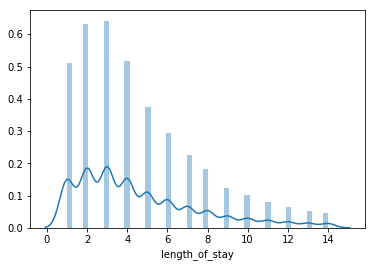

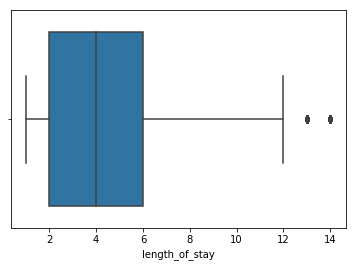

***num_lab_procedures***


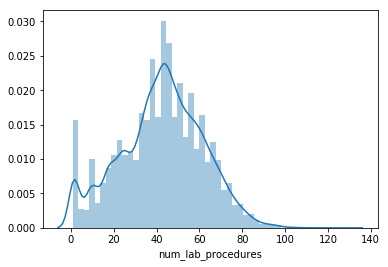

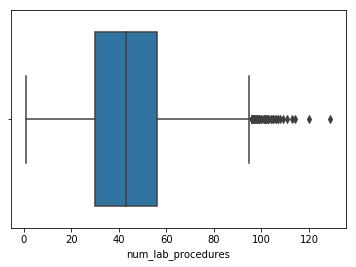

***num_procedures***


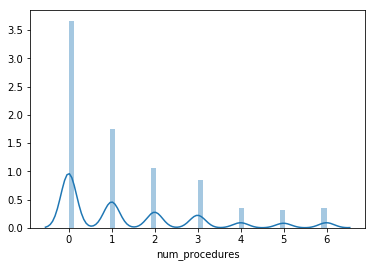

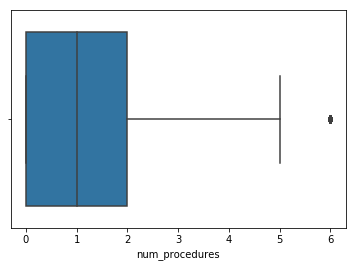

***num_medications***


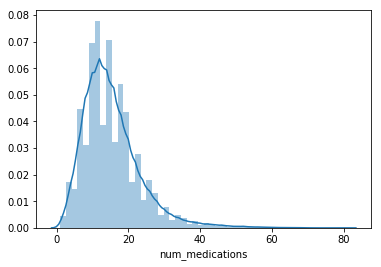

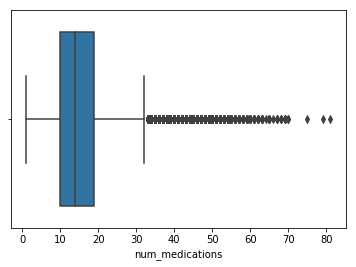

***number_outpatient***


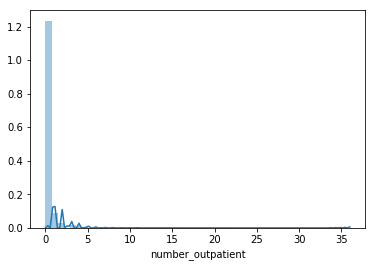

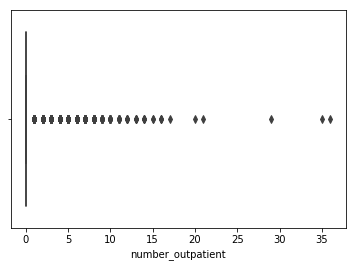

***number_emergency***


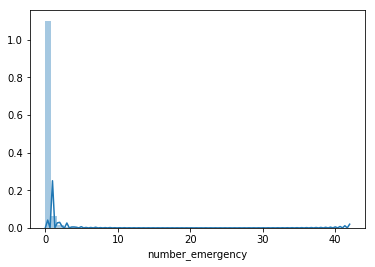

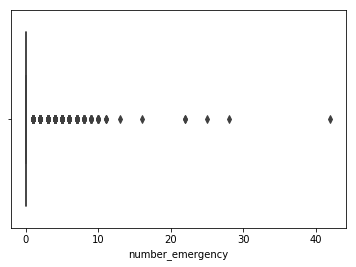

***number_inpatient***


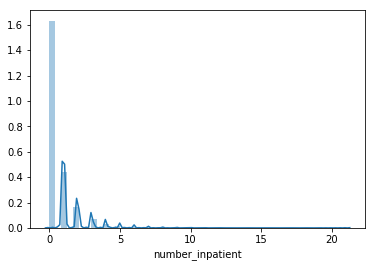

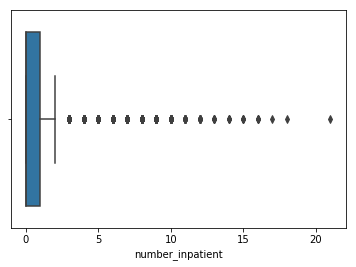

***number_diagnoses***


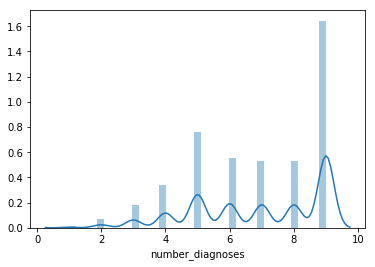

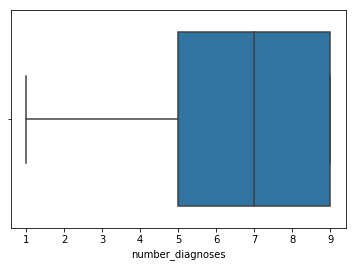

In [63]:
print("***length_of_stay***")
draw_plot('length_of_stay')
draw_boxplot('length_of_stay')
print('***num_lab_procedures***')
draw_plot('num_lab_procedures')
draw_boxplot('num_lab_procedures')
print('***num_procedures***')
draw_plot('num_procedures')
draw_boxplot('num_procedures')
print('***num_medications***')
draw_plot('num_medications')
draw_boxplot('num_medications')
print('***number_outpatient***')
draw_plot('number_outpatient')
draw_boxplot('number_outpatient')
print('***number_emergency***')
draw_plot('number_emergency')
draw_boxplot('number_emergency')
print('***number_inpatient***')
draw_plot('number_inpatient')
draw_boxplot('number_inpatient')
print('***number_diagnoses***')
draw_plot('number_diagnoses')
draw_boxplot('number_diagnoses')

In [68]:
def draw_countplot(col_name):
    db = sns.countplot(col_name)
    plt.show()

***Age***


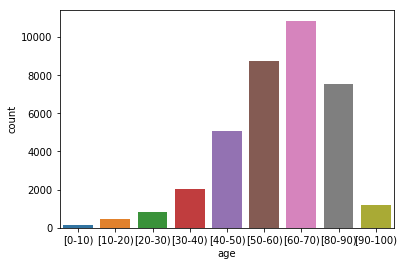

***race***


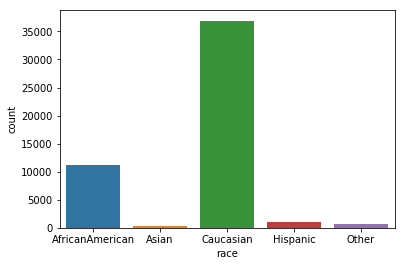

***weight***


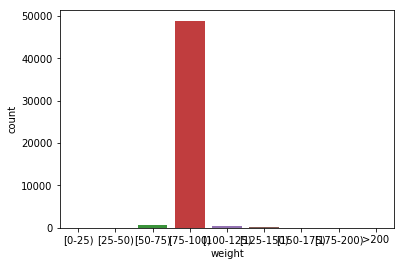

***gender***


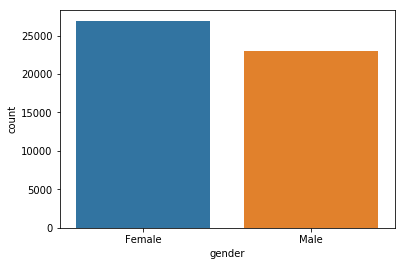

***medical specialty***


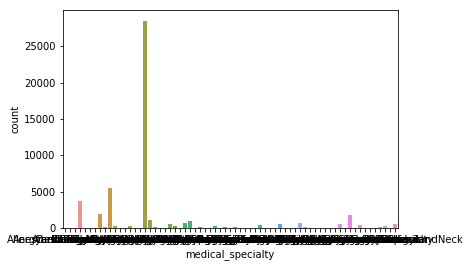

***max glu serum***


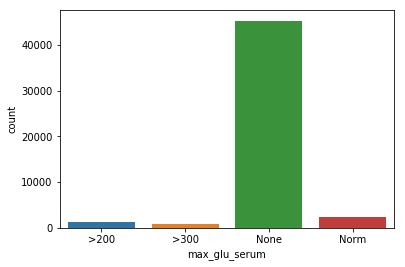

***A1Cresult***


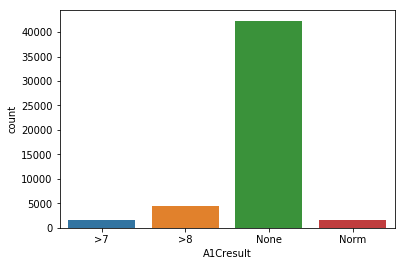

***metformin***


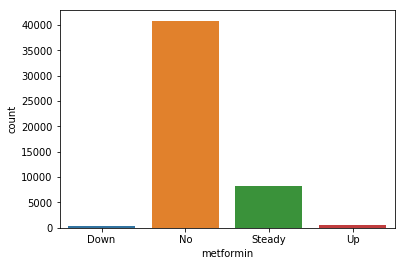

***repaglinide***


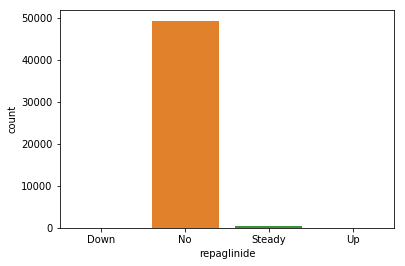

***nateglinide***


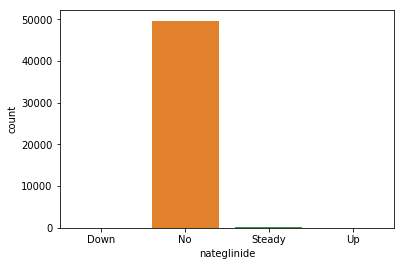

***chlorpropamide***


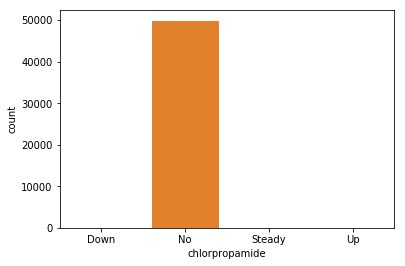

***glimepiride***


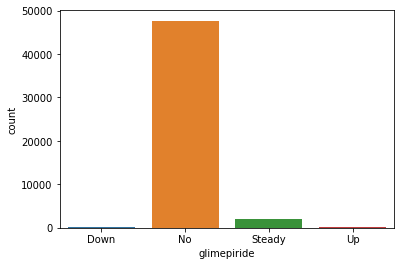

***acetohexamide***


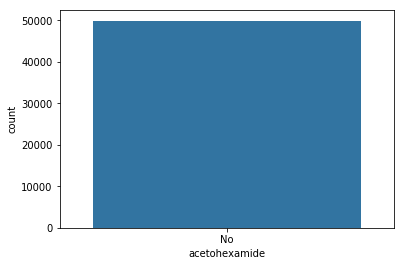

***glipizide***


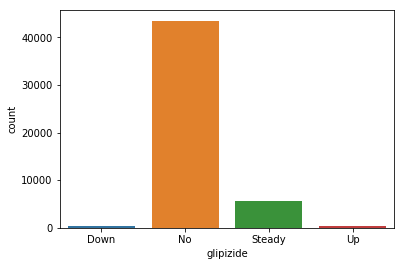

***glyburide***


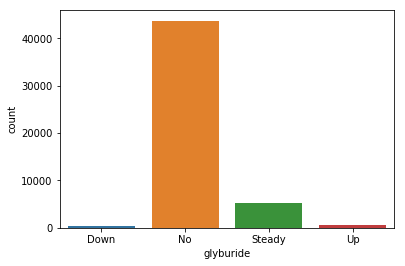

***tolbutamide***


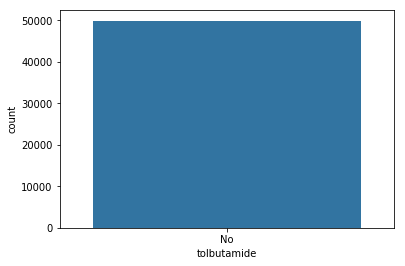

***insulin***


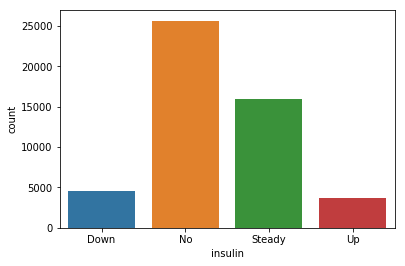

***readmitted***


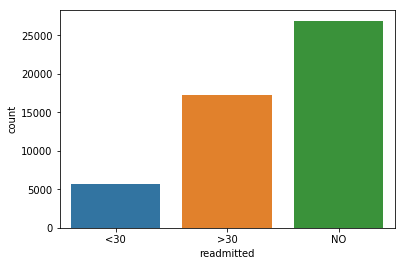

In [72]:
print('***Age***')
draw_countplot(df['age'])
print('***race***')
draw_countplot(df['race'])
print('***weight***')
draw_countplot(df['weight'])
print('***gender***')
draw_countplot(df['gender'])
print('***medical specialty***')
draw_countplot(df['medical_specialty'])
print('***max glu serum***')
draw_countplot(df['max_glu_serum'])
print('***A1Cresult***')
draw_countplot(df['A1Cresult'])
print('***metformin***')
draw_countplot(df['metformin'])
print('***repaglinide***')
draw_countplot(df['repaglinide'])
print('***nateglinide***')
draw_countplot(df['nateglinide'])
print('***chlorpropamide***')
draw_countplot(df['chlorpropamide'])
print('***glimepiride***')
draw_countplot(df['glimepiride'])
print('***acetohexamide***')
draw_countplot(df['acetohexamide'])
print('***glipizide***')
draw_countplot(df['glipizide'])
print('***glyburide***')
draw_countplot(df['glyburide'])
print('***tolbutamide***')
draw_countplot(df['tolbutamide'])
print('***insulin***')
draw_countplot(df['insulin'])
print('***readmitted***')
draw_countplot(df['readmitted'])

In [ ]:
# Determine if there is any relationship between the variables dibetes and 
# diabetesMed? How would you handle these two variables in the data 
# modelling if a relationship exists?

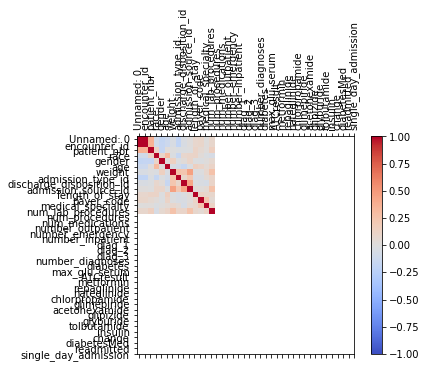

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()


In [ ]:
crosstab = pd.crosstab(index=df['diabetes'], columns=df['diabetesMed'])
print(crosstab)

In [ ]:
df2 = df[['diabetes', 'diabetesMed']]

In [ ]:
# Correlation between diabetes and diabetesMed.
df2.corr(method = 'pearson')